In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import Rotator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import random

### Loading the Dataset

In [30]:
data = pd.read_csv("C:/Users/manas/Downloads/data_alexithymia_csv.csv")

In [31]:
data

,ID,Sex,Age,X.confused,X.right.words,X.sensations,X.describe,X.analyze.problems,X.upset,X.puzzled,...,X.describe.more,X.going.on,X.why.angry,X.daily.activities,X.entertainment,X.reveal.feelings,X.close,X.useful,X.hidden.meanings,CESD
0,1,F,19,0,0,0,3,1,0,0,...,0,0,0,2,3,0,4,2,2,0
1,2,M,19,3,3,0,3,4,2,1,...,0,1,1,1,1,1,2,3,1,23
2,3,M,18,3,1,0,3,3,0,0,...,0,0,3,1,0,0,3,2,0,46
3,4,M,18,2,0,0,4,4,0,2,...,0,0,0,4,0,4,4,4,4,11
4,5,M,18,1,2,0,4,4,1,0,...,2,0,0,0,0,1,4,3,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,118,F,18,2,0,0,4,4,0,0,...,0,0,0,1,0,0,0,3,1,3
118,119,F,18,3,3,2,0,3,0,2,...,0,1,3,1,0,1,3,3,0,42
119,120,F,18,0,2,0,3,1,0,0,...,0,1,1,0,0,4,4,2,2,17
120,121,M,20,0,1,0,3,1,0,0,...,0,0,0,3,3,0,3,1,2,7


#### Selecting the TAS_20 items


In [4]:
tas_variables_of_interest = data.loc[:, 'X.confused':'X.hidden.meanings']

In [5]:
tas_variables_of_interest

,X.confused,X.right.words,X.sensations,X.describe,X.analyze.problems,X.upset,X.puzzled,X.let.happen,X.identify,X.essential,X.feel.about.people,X.describe.more,X.going.on,X.why.angry,X.daily.activities,X.entertainment,X.reveal.feelings,X.close,X.useful,X.hidden.meanings
0,0,0,0,3,1,0,0,2,0,2,1,0,0,0,2,3,0,4,2,2
1,3,3,0,3,4,2,1,1,2,3,2,0,1,1,1,1,1,2,3,1
2,3,1,0,3,3,0,0,0,1,3,0,0,0,3,1,0,0,3,2,0
3,2,0,0,4,4,0,2,0,0,4,0,0,0,0,4,0,4,4,4,4
4,1,2,0,4,4,1,0,1,1,4,1,2,0,0,0,0,1,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2,0,0,4,4,0,0,0,0,4,0,0,0,0,1,0,0,0,3,1
118,3,3,2,0,3,0,2,0,2,3,0,0,1,3,1,0,1,3,3,0
119,0,2,0,3,1,0,0,3,3,3,1,0,1,1,0,0,4,4,2,2
120,0,1,0,3,1,0,0,2,0,1,2,0,0,0,3,3,0,3,1,2


##### Standardize the data

In [6]:
scaler = StandardScaler()
tas_variables_of_interest_standardized = scaler.fit_transform(tas_variables_of_interest)

### Performing PCA

In [7]:
pca = PCA()
pca.fit(tas_variables_of_interest_standardized)


PCA()

#### Deciding the no. of components

In [8]:
variance_comp_explained = pca.explained_variance_ratio_
total_variance = variance_comp_explained.cumsum()


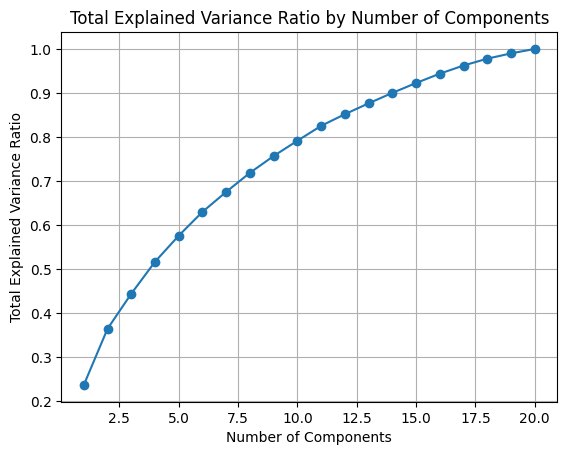

In [9]:
plt.plot(range(1, len(variance_comp_explained) + 1), total_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance Ratio')
plt.title('Total Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

#### Performing PCA again after deciding the components

In [10]:
retain_comp = 8 
pca = PCA(n_components=retain_comp)
pca.fit_transform(tas_variables_of_interest_standardized)

array([[-3.14230586e+00, -2.10368631e+00, -8.10467326e-01,
        -1.38390838e+00,  1.36184775e-01, -2.52844050e-01,
        -2.31657914e-01, -4.11691504e-01],
       [-2.47956451e-02,  1.63665579e+00,  1.50414363e-01,
         7.53942626e-01, -8.21373256e-02, -5.62244996e-01,
         7.83226831e-01,  4.54972625e-01],
       [-2.12571168e+00,  1.44845463e+00,  1.16799701e+00,
         2.50643658e-02, -1.69938449e+00,  4.91091017e-01,
         4.36730714e-01,  4.88728474e-01],
       [-2.43833808e+00,  1.37451366e+00, -2.80199942e+00,
         1.44229708e+00,  2.47101698e+00,  3.87126782e-01,
        -3.77424417e-01,  1.00944111e+00],
       [-2.18561720e+00,  1.81915074e+00, -2.05045519e+00,
         1.01208862e+00,  6.28649767e-01, -4.32306813e-01,
        -1.94595546e+00, -1.84403173e+00],
       [ 3.71730590e+00,  4.27306531e-01, -1.70318224e+00,
         1.07540018e+00,  5.72694543e-01, -4.58874666e-01,
        -8.12572762e-02,  6.74206563e-01],
       [ 2.47206191e+00, -1.120735

#### Transferring the Data to reduced dimensional space

In [11]:
tas_variables_of_interest_reduced = pca.transform(tas_variables_of_interest_standardized)


In [12]:
tas_variables_of_interest_reduced

array([[-3.14230586e+00, -2.10368631e+00, -8.10467326e-01,
        -1.38390838e+00,  1.36184775e-01, -2.52844050e-01,
        -2.31657914e-01, -4.11691504e-01],
       [-2.47956451e-02,  1.63665579e+00,  1.50414363e-01,
         7.53942626e-01, -8.21373256e-02, -5.62244996e-01,
         7.83226831e-01,  4.54972625e-01],
       [-2.12571168e+00,  1.44845463e+00,  1.16799701e+00,
         2.50643658e-02, -1.69938449e+00,  4.91091017e-01,
         4.36730714e-01,  4.88728474e-01],
       [-2.43833808e+00,  1.37451366e+00, -2.80199942e+00,
         1.44229708e+00,  2.47101698e+00,  3.87126782e-01,
        -3.77424417e-01,  1.00944111e+00],
       [-2.18561720e+00,  1.81915074e+00, -2.05045519e+00,
         1.01208862e+00,  6.28649767e-01, -4.32306813e-01,
        -1.94595546e+00, -1.84403173e+00],
       [ 3.71730590e+00,  4.27306531e-01, -1.70318224e+00,
         1.07540018e+00,  5.72694543e-01, -4.58874666e-01,
        -8.12572762e-02,  6.74206563e-01],
       [ 2.47206191e+00, -1.120735

#### Performing rotations to get a clearer picture of the result

In [13]:
rotated_result = Rotator(method='varimax')  # You can choose other rotation methods as well
rotated_components = rotated_result.fit_transform(pca.components_)



In [14]:

variance_comp_explained = pca.explained_variance_ratio_
print("Explained Variance Ratio:", variance_comp_explained)
print("Rotated Components:\n", rotated_components)

Explained Variance Ratio: [0.23633569 0.1277815  0.07956262 0.07264861 0.05927742 0.05410012
 0.04542591 0.04335007]
Rotated Components:
 [[ 1.41462750e-16  1.00000000e+00 -7.46209957e-07  1.02204175e-16
   9.03094569e-17 -5.71234990e-17 -1.29600018e-16 -1.63318345e-16
  -1.67178066e-16  4.09420792e-07 -1.28671371e-16  1.83050840e-07
  -5.40231690e-17  2.45429889e-17 -1.59111954e-07  1.14151079e-17
   1.94289029e-16 -1.73252699e-08 -4.27365378e-07  1.04194068e-07]
 [-1.21017162e-17  4.27365176e-07 -9.76698804e-07  1.49150336e-16
  -6.29977203e-17 -4.74091209e-17 -2.79102506e-17  6.99962113e-17
  -4.42933910e-17  5.37181797e-07  1.87276595e-17  4.66402084e-08
  -9.69803099e-18 -3.62408468e-17  5.39259843e-06 -1.52996645e-16
  -8.32667268e-17 -1.51451183e-07  1.00000000e+00  9.54416509e-07]
 [ 1.21871403e-16 -1.59108367e-07  1.25595692e-06 -1.35981311e-16
  -1.66123082e-16 -7.02417907e-17  7.30476000e-17 -1.22892623e-16
   4.13983525e-17 -3.71193527e-07 -9.20601984e-17 -3.76848941e-07
  

## K means clustering

In [15]:
Kmeanslist = []

C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

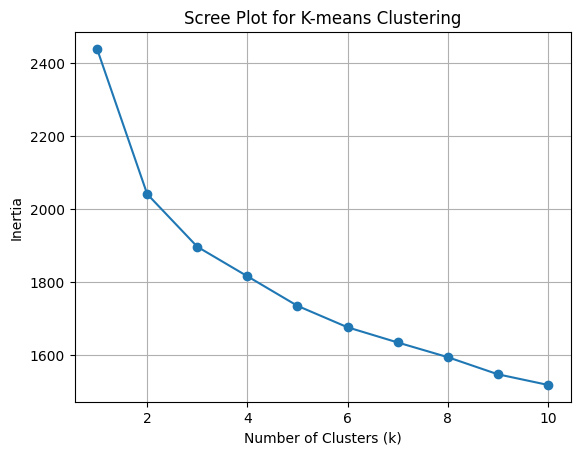

In [16]:

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tas_variables_of_interest_standardized)
    Kmeanslist.append(kmeans.inertia_)

# Plot scree plot
plt.plot(range(1, 11), Kmeanslist, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means Clustering')
plt.grid(True)
plt.show()



C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manas\AppData\Local\Temp\ipykernel_70200\562002618.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))
C:\Python 3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


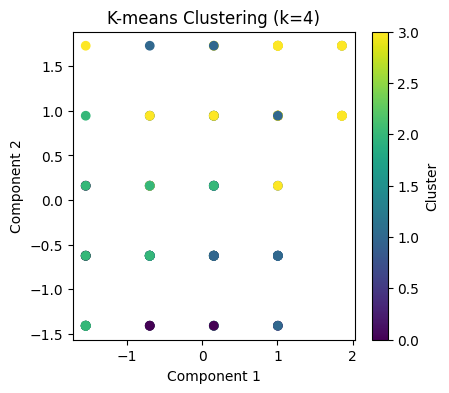

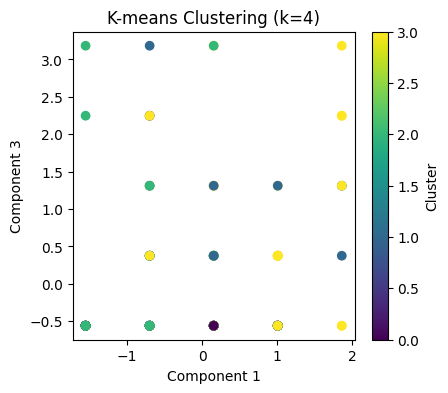

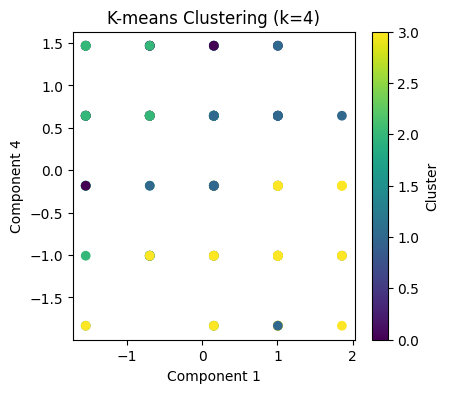

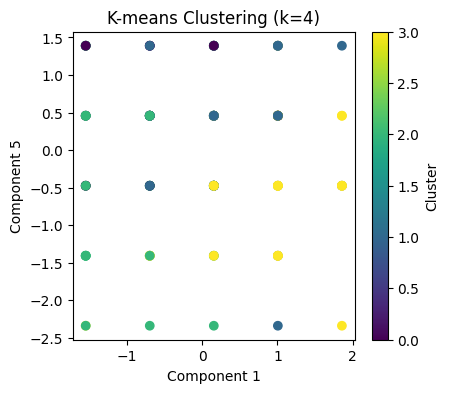

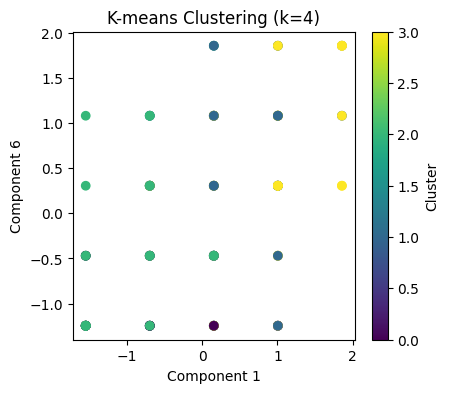

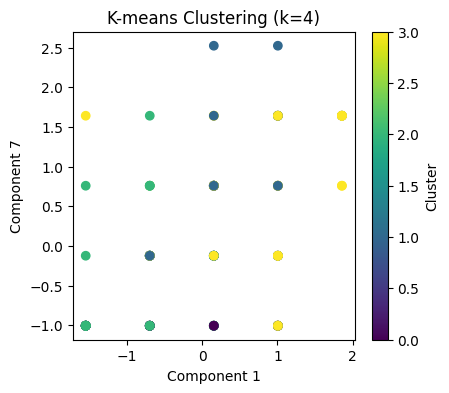

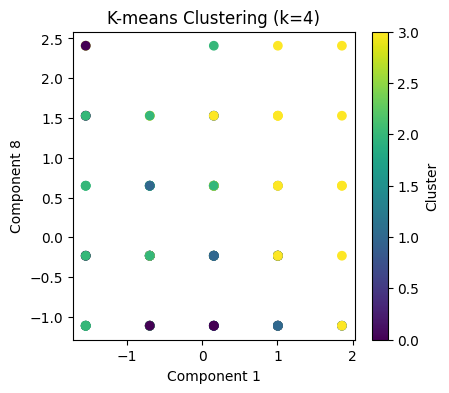

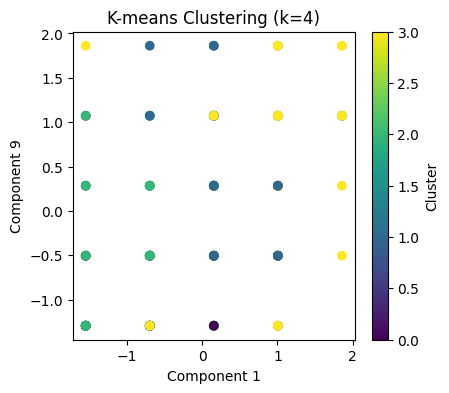

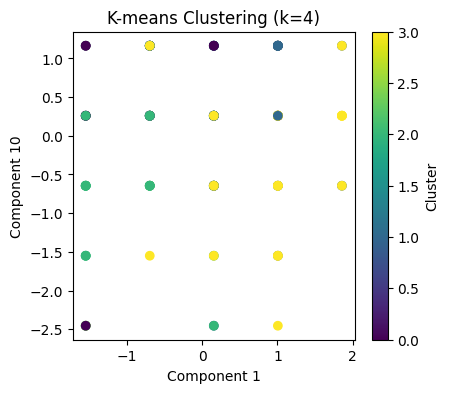

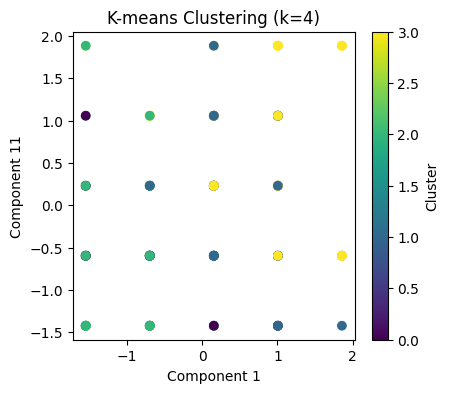

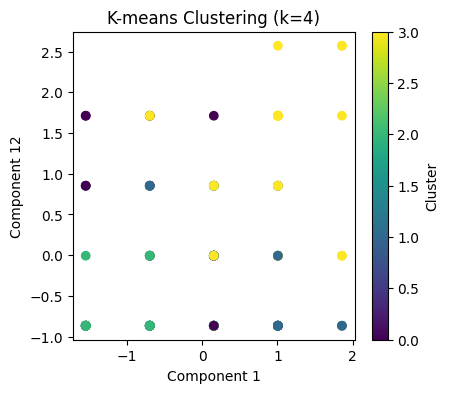

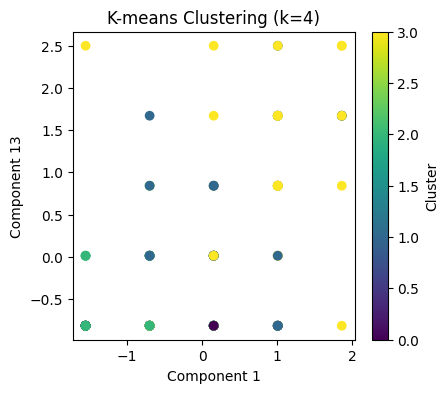

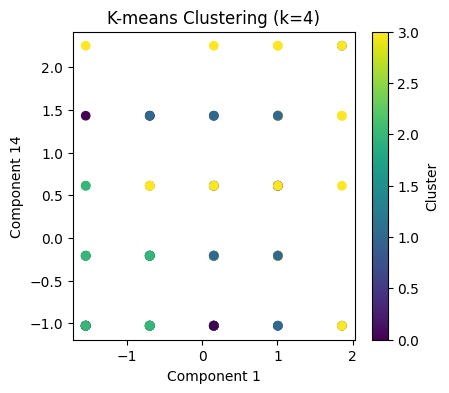

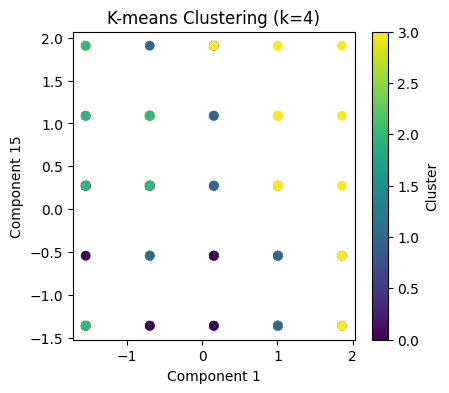

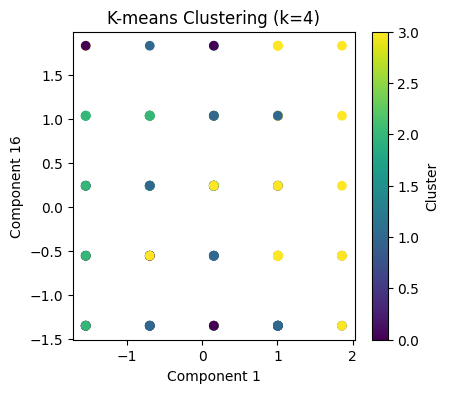

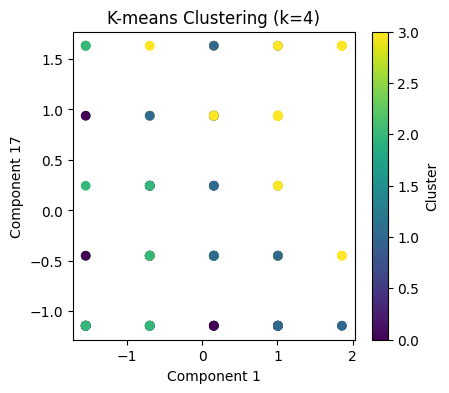

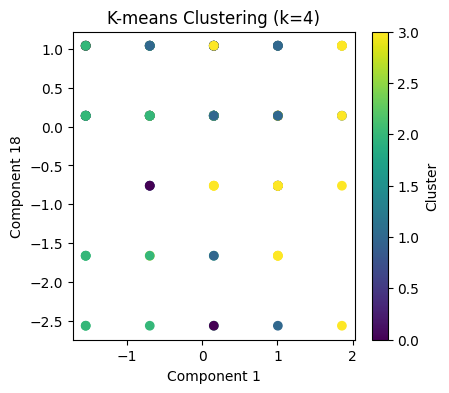

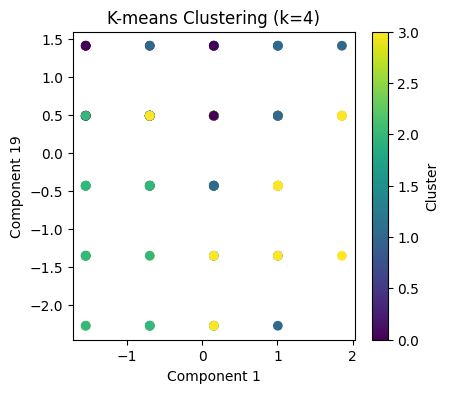

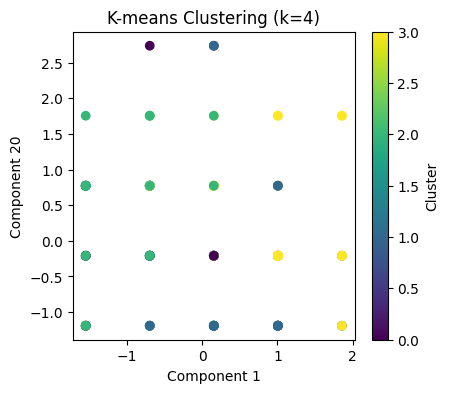

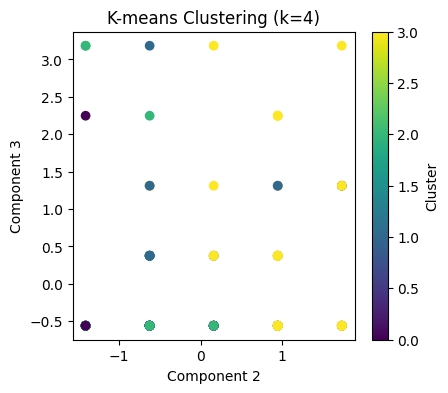

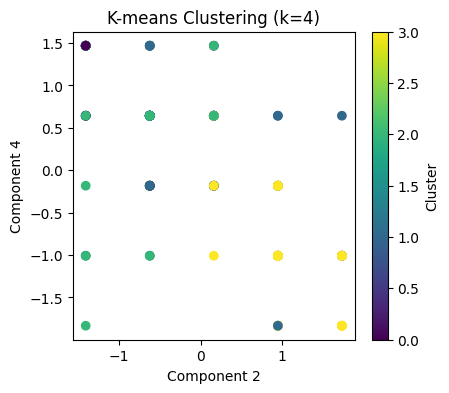

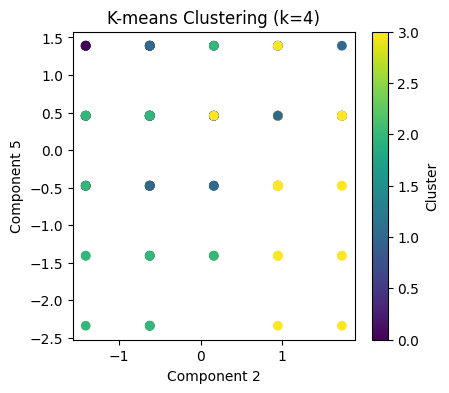

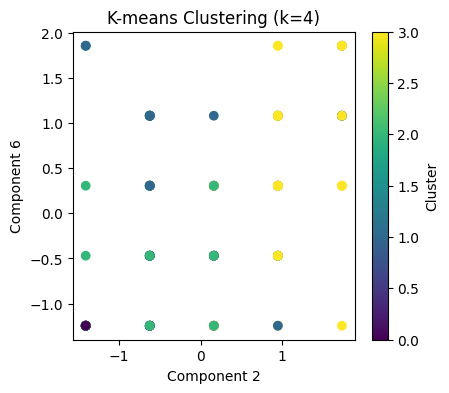

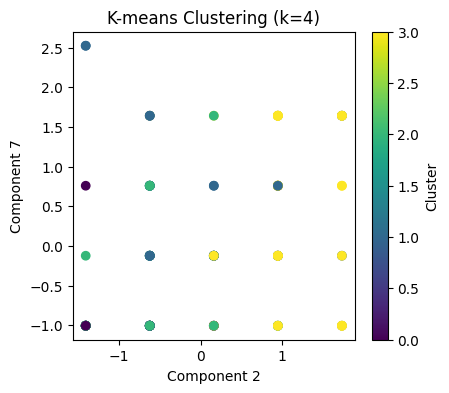

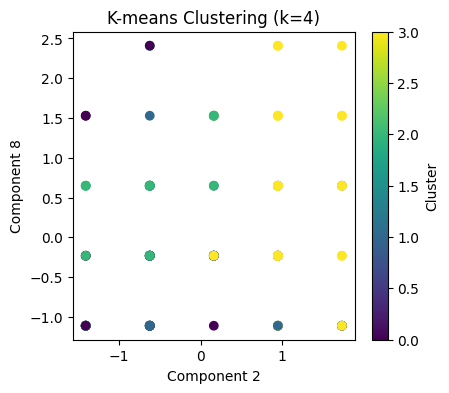

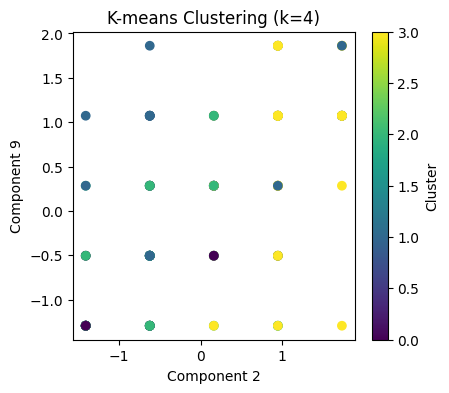

Error in callback <function flush_figures at 0x0000018C4E430AE0> (for post_execute):


KeyboardInterrupt: 

In [17]:

best_kmeans = [4, 6]  # Example, you can choose based on the scree plot

# Step a3: Run k-means clustering again with the selected k's
for k in best_kmeans:
    kmeans = KMeans(n_clusters=k, random_state=123)
    labels = kmeans.fit_predict(tas_variables_of_interest_standardized)
    plot_count = 5
    
    # Plot results for each pair of variables
    for i in range(plot_count):
        for j in range(i + 1, tas_variables_of_interest_standardized.shape[1]):
            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.scatter(tas_variables_of_interest_standardized[:, i], tas_variables_of_interest_standardized[:, j], c=labels, cmap='viridis')
            plt.title(f'K-means Clustering (k={k})')
            plt.xlabel(f'Component {i+1}')
            plt.ylabel(f'Component {j+1}')
            plt.colorbar(label='Cluster')
            
            # Create contingency table
            

## Hierarchial plotting

In [18]:
random_selection = random.sample(range(len(tas_variables_of_interest_standardized)), 20)
random_values_for_plotting = tas_variables_of_interest_standardized[random_selection]

C:\Python 3.11\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


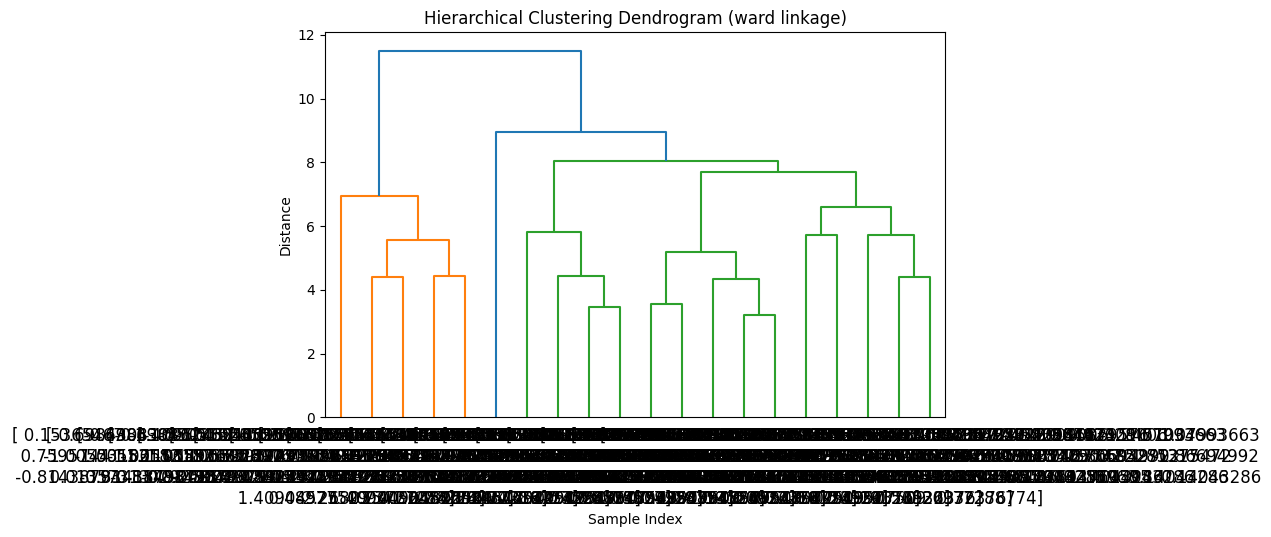

C:\Python 3.11\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


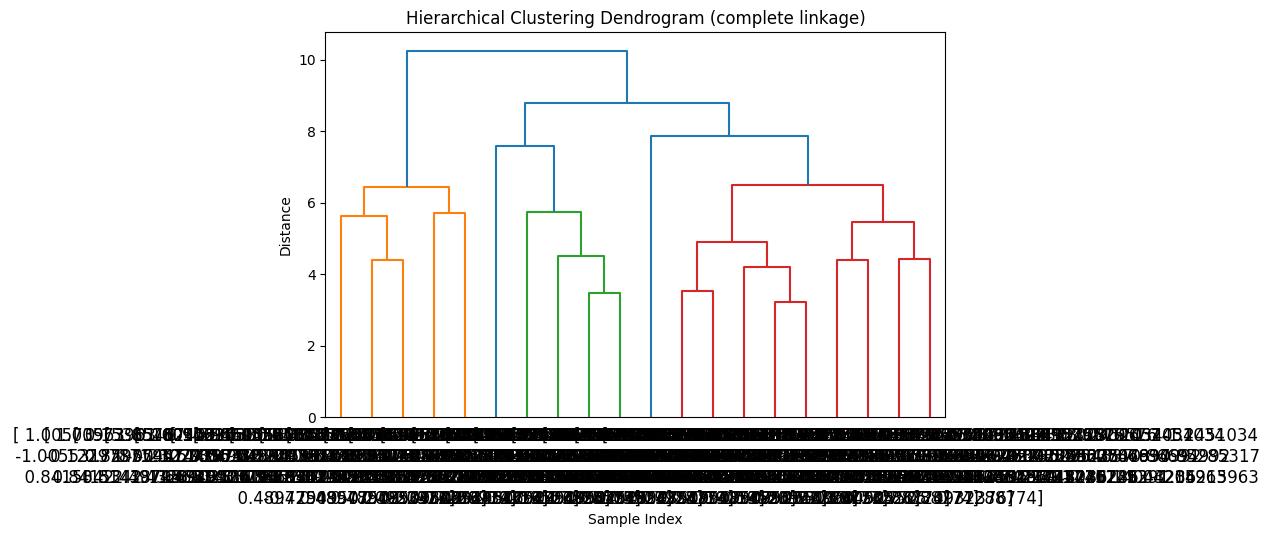

C:\Python 3.11\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


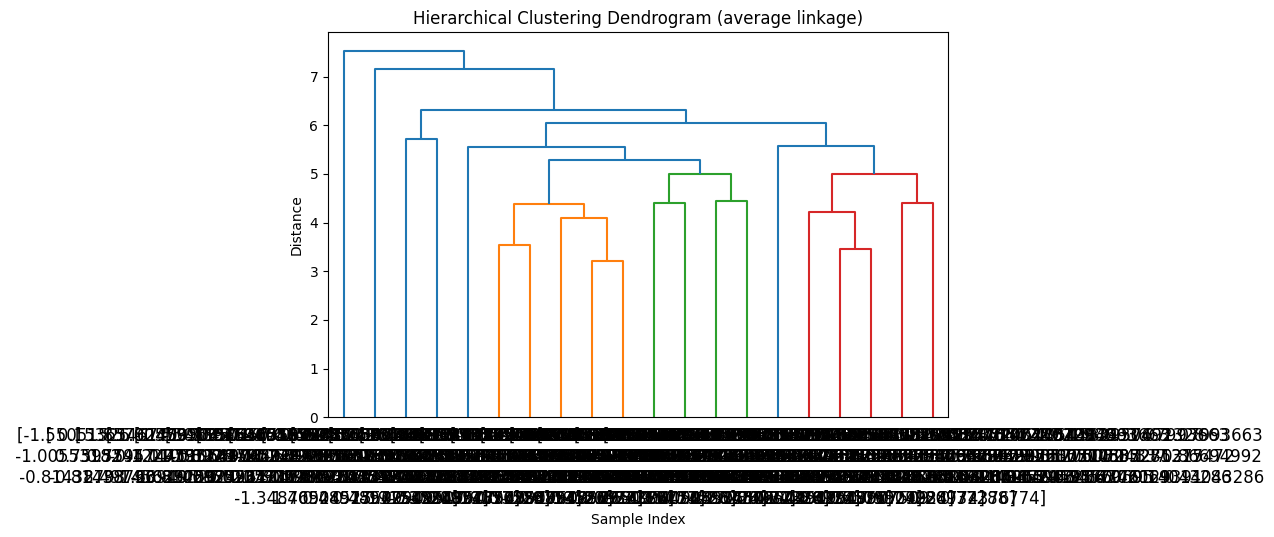

C:\Python 3.11\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


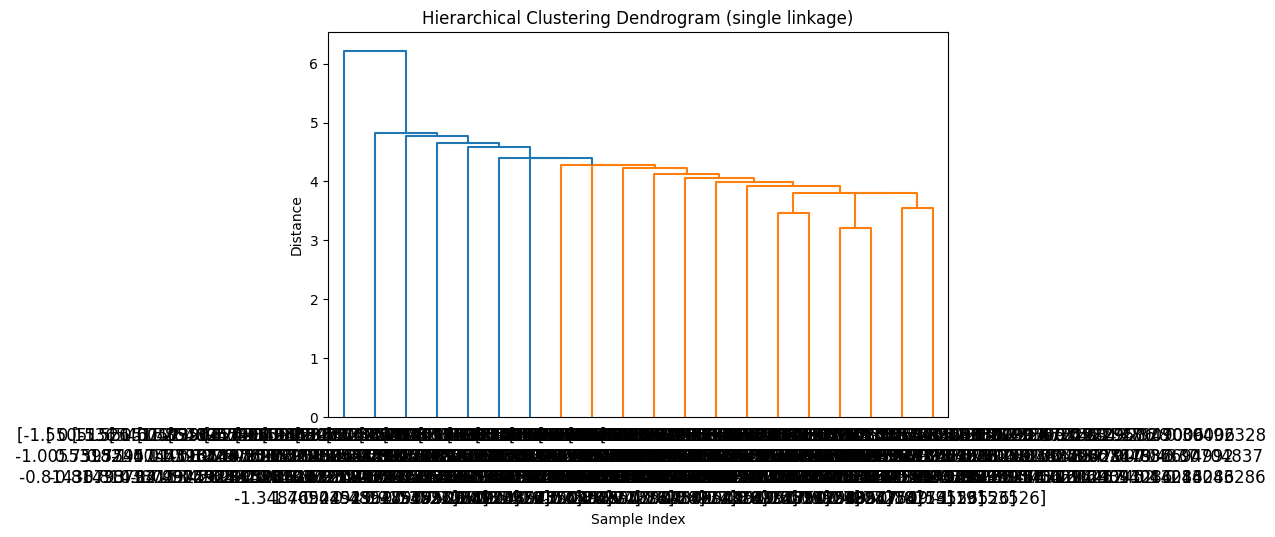

In [19]:
hierarchial_methods = ['ward', 'complete', 'average', 'single']
for method in hierarchial_methods:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = model.fit_predict(random_values_for_plotting)
    linkage_matrix = linkage(random_values_for_plotting, method=method)
    # Plot dendrogram
    plt.figure(figsize=(8, 5))
    dendrogram(linkage_matrix, labels=random_values_for_plotting)
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()